<a href="https://colab.research.google.com/github/Christopher-Ramirez-S/An-lisis-de-datos/blob/Adrian/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

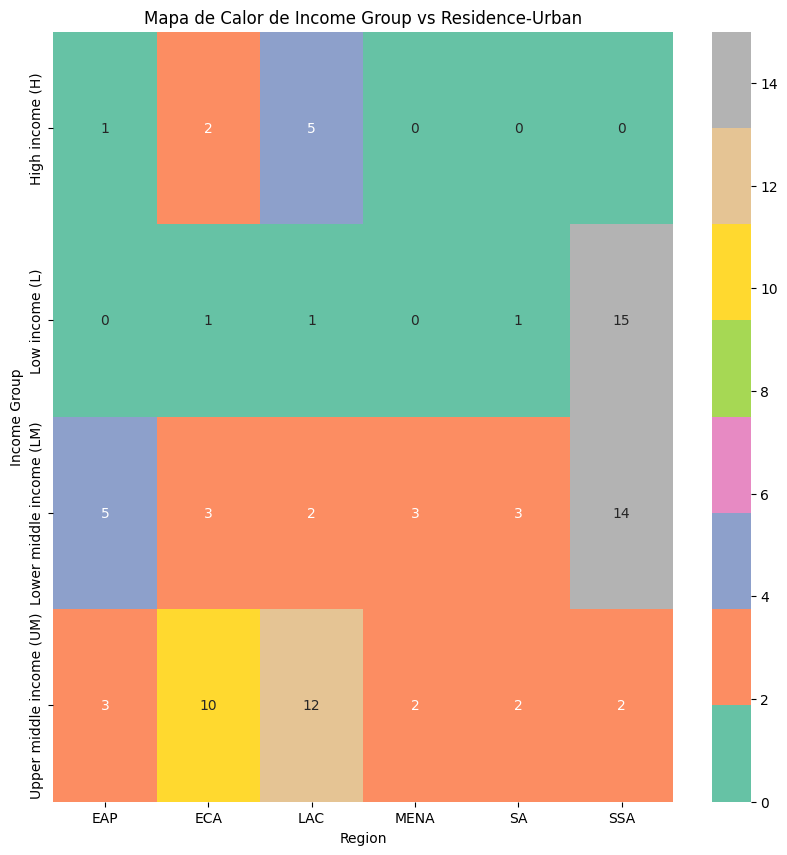

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/School-Age-Digital-Connectivity - Primary.csv')

contingency_table = pd.crosstab(df['Income Group'], df['Region'])

plt.figure(figsize=(10, 10))
sns.heatmap(contingency_table, annot=True, cmap="Set2")

plt.title('Mapa de Calor de Income Group vs Residence-Urban')
plt.show()

In [1]:
import requests
import json
import concurrent.futures
import threading
import time
import logging
import os
from tqdm import tqdm
import datetime
import pandas as pd
import csv
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv')
data = pd.DataFrame(df)

In [32]:
start_date = pd.to_datetime('1920-01-01')
end_date = pd.to_datetime('2024-01-31')
data['release_date'] = pd.to_datetime(data['release_date'])

filtered_data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]
fd = filtered_data

In [11]:
if filtered_data['spoken_languages'].dtype == 'object':
    filtered_data['spoken_languages'] = filtered_data['spoken_languages'].str.replace('[', '').str.replace(']', '')
    all_languages = ','.join(filtered_data['spoken_languages'].dropna()).split(',')
    all_languages = [lang.strip().replace("'", "") for lang in all_languages if lang.strip()]

    # Count occurrences of each language and get the top 5
    language_counts = pd.Series(all_languages).value_counts()
    top_5_languages = language_counts.head(5)

    # Print the top 5 spoken languages
    print(top_5_languages)
else:
    print("The 'spoken_languages' column is not of type 'object'. It might be empty or have a different data type.")

English     1080
French       223
Spanish      217
Japanese     186
German       153
Name: count, dtype: int64


<ipython-input-11-ab5559fe2b24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['spoken_languages'] = filtered_data['spoken_languages'].str.replace('[', '').str.replace(']', '')


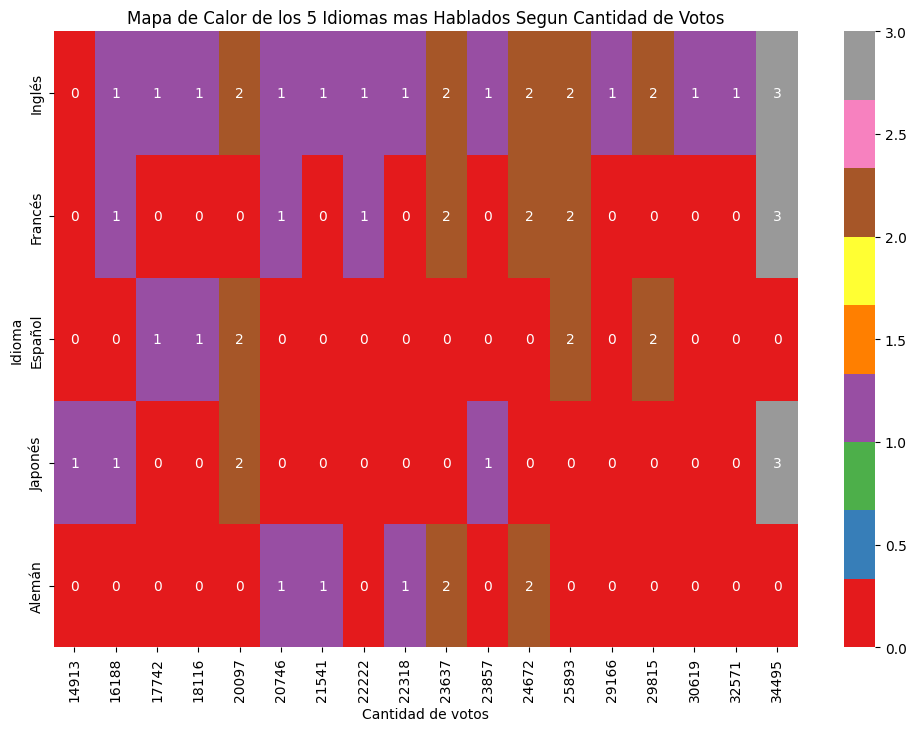

In [44]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'fd' is your DataFrame containing 'spoken_languages' and 'vote_average'

# Filter for the desired languages and get top 5 movies for each language
languages = ['English', 'French', 'Spanish', 'Japanese', 'German']

def get_top_movies(df, language):
  return df[df['spoken_languages'].str.contains(language, na=False)].nlargest(5, 'vote_count')

top_movies = pd.concat([get_top_movies(fd, lang) for lang in languages])


# Convert spoken_languages to a list of strings
top_movies['spoken_languages'] = top_movies['spoken_languages'].str.strip("[]").str.replace("'", "").str.split(', ')

# Explode the list of spoken languages
movies_exploded = top_movies.explode('spoken_languages')

# Create the contingency table using vote_average instead of vote_count
contingency_table = pd.crosstab(movies_exploded['spoken_languages'], movies_exploded['vote_count'])

# Nombres de columna personalizados
nombres_columnas = ['Inglés', 'Francés', 'Español', 'Japonés', 'Alemán']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table.loc[languages], annot=True, cmap="Set1", fmt="d", yticklabels=nombres_columnas)

plt.title('Mapa de Calor de los 5 Idiomas mas Hablados Segun Cantidad de Votos')
plt.xlabel("Cantidad de votos")  # Nuevo nombre para el eje x (antes 'spoken_languages')
plt.ylabel("Idioma")
plt.show()